## Paper notebook

An explanatory notebook to go with the paper for this work (unpublished)

Import the module first.

In [1]:
import autoencodeSVJ.utils as utils
import autoencodeSVJ.evaluate as ev

Using TensorFlow backend.


### Check models

We can check all training runs, with their parameters, using the `utils.summary()` command. This information is all a part of this repo.

We can also filter the information; it is a wrapped pandas data table.

In [6]:
summ = utils.summary()
summ.head(2)

,arch,batch_size,eflow,eflow_base,end_time,epochs,filename,filepath,hlf,input_dim,...,optimizer,qcd_path,seed,signal_path,start_time,summary_path,target_dim,test_split,time,val_split
0,"[12, 30, 30, 10, 30, 30, 12]",64,True,3,2019-08-05 17:44:40.959758,5,eflow3_10_v0,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,False,12,...,adam,data/background/base_3/*.h5,30845729,data/signal/base_3/*.h5,2019-08-05 17:44:19.088882,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,10,0.15,2019-08-07 14:14:27,0.15
1,"[12, 30, 30, 10, 30, 30, 12]",64,True,3,2019-08-05 17:48:20.014616,5,eflow3_10_v1,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,False,12,...,adam,data/background/base_3/*.h5,70615207,data/signal/base_3/*.h5,2019-08-05 17:47:59.497735,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,10,0.15,2019-08-07 14:14:27,0.15


*Much* more readable with some edits:

In [7]:
summ.cdrop(['arch', '*time', 'eflow','batch_size', 'filepath']).sort_values('mae_auc')[::-1][utils.summary().hlf == 1].head(10)

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-centos7-gcc7-opt/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,eflow_base,epochs,filename,hlf,input_dim,learning_rate,loss,mae_auc,mse_auc,norm_type,optimizer,qcd_path,seed,signal_path,summary_path,target_dim,test_split,val_split
141,3,100,hlf_eflow3_15_v1,True,19,0.000557535,mae,0.990073,0.989479,StandardScaler,adam,data/background/base_3/*.h5,76165,data/signal/base_3/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,15,0.15,0.325114
171,4,100,hlf_eflow4_15_v4,1,42,0.00617377,mse,0.985357,0.986598,StandardScaler,adam,data/background/base_4/*.h5,42,data/signal/base_4/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,15,0.15,0.15
179,4,100,hlf_eflow4_18_v0,1,42,0.001,mse,0.984906,0.984036,StandardScaler,adam,data/background/base_4/*.h5,73367766,data/signal/base_4/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,18,0.15,0.15
144,3,100,hlf_eflow3_27_v0,True,19,0.000355827,mse,0.984777,0.985934,StandardScaler,adam,data/background/base_3/*.h5,78619,data/signal/base_3/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,27,0.15,0.380028
188,4,100,hlf_eflow4_26_v0,True,42,0.00174687,mse,0.98439,0.982264,StandardScaler,adam,data/background/base_4/*.h5,76165,data/signal/base_4/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,26,0.15,0.422652
185,4,100,hlf_eflow4_24_v0,1,42,0.001,mse,0.984042,0.984014,StandardScaler,adam,data/background/base_4/*.h5,11168550,data/signal/base_4/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,24,0.15,0.15
161,4,100,hlf_eflow4_15_v13,1,42,0.000799909,mse,0.983685,0.983041,StandardScaler,adam,data/background/base_4/*.h5,42,data/signal/base_4/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,15,0.15,0.15
146,3,100,hlf_eflow3_30_v1,True,19,0.000914994,mae,0.983567,0.981455,StandardScaler,adam,data/background/base_3/*.h5,76165,data/signal/base_3/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,30,0.15,0.05
189,4,100,hlf_eflow4_26_v1,1,42,0.001,mse,0.983308,0.982533,StandardScaler,adam,data/background/base_4/*.h5,25519060,data/signal/base_4/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,26,0.15,0.15
155,4,100,hlf_eflow4_14_v0,1,42,0.001,mse,0.982527,0.982239,StandardScaler,adam,data/background/base_4/*.h5,58277002,data/signal/base_4/*.h5,/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW...,14,0.15,0.15


In [13]:
e = ev.ae_evaluation("hlf_eflow3_15_v1")

found 1 matches with search '/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/autoencode/data/summary/hlf_eflow3_15_v1.summary'
train_shell :: using saved model


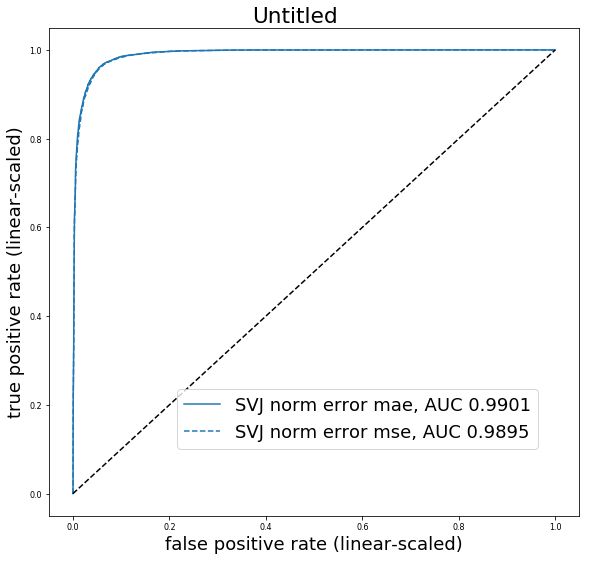

In [14]:
e.roc()

In [15]:
e.SVJ

,Eta,Phi,Pt,M,ChargedFraction,PTD,Axis2,eflow 1,eflow 2,eflow 3,eflow 4,eflow 5,eflow 6,eflow 7,eflow 8,eflow 9,eflow 10,eflow 11,eflow 12
0,-0.387827,-0.105810,737.162781,276.280151,0.579545,0.203285,0.039276,0.403329,0.269089,0.196442,0.176252,0.119943,0.053583,0.084014,0.074336,0.162675,0.108531,0.071087,0.065611
1,-0.649197,2.807501,280.272217,69.819489,0.536585,0.174920,0.119018,0.388157,0.215878,0.140821,0.167049,0.100063,0.070769,0.081416,0.070376,0.150665,0.083795,0.064841,0.058482
2,0.599861,0.363421,592.978760,199.538788,0.423729,0.232529,0.112624,0.464611,0.307657,0.234326,0.234584,0.163928,0.112906,0.128957,0.116205,0.215863,0.142941,0.108991,0.100293
3,0.000532,-2.649830,484.012482,33.521217,0.419355,0.284013,0.034754,0.187355,0.098144,0.067174,0.064215,0.041060,0.018994,0.035501,0.016234,0.035102,0.018388,0.012031,0.006577
4,1.001780,-1.905116,795.974976,194.371811,0.432432,0.251500,0.075146,0.305505,0.161886,0.108717,0.117690,0.071303,0.042594,0.057925,0.041326,0.093333,0.049457,0.035955,0.028514
5,1.130290,0.991206,210.453323,36.178070,0.382353,0.229706,0.060279,0.323092,0.159834,0.099410,0.122532,0.068762,0.047356,0.056720,0.044764,0.104388,0.051641,0.039589,0.033727
6,1.102625,-0.158879,626.803223,243.889984,0.509804,0.183123,0.142449,0.468272,0.308824,0.239003,0.245568,0.173193,0.129752,0.142449,0.125400,0.219278,0.144614,0.114993,0.102682
7,0.343362,-3.055373,201.355988,63.604462,0.638298,0.173657,0.111257,0.477447,0.312600,0.236653,0.245277,0.169006,0.122331,0.136329,0.124464,0.227955,0.149250,0.117107,0.108837
8,1.013588,-0.842279,685.238708,198.442108,0.573529,0.221495,0.078575,0.355668,0.199423,0.139061,0.151584,0.095142,0.065128,0.077463,0.061357,0.126500,0.070929,0.053914,0.044992
9,0.238738,2.218364,341.280334,107.645615,0.676923,0.175518,0.113401,0.423364,0.248635,0.170528,0.193431,0.121161,0.085858,0.097754,0.087383,0.179237,0.105263,0.081891,0.075882


In [14]:

for dim in range(2,30):
    iev.ae_train(
        hlf=1,
        eflow=1,
        qcd_path="data/background/base_4/*.h5",
        signal_path="data/signal/base_4/*.h5",
        interm_architecture=(30, 20),
        target_dim=dim,
        learning_rate=0.001,
        verbose=False,
    )
    

In [9]:
help(ev.ae_train)

Help on function ae_train in module autoencodeSVJ.evaluate:

ae_train(signal_path, qcd_path, target_dim, hlf=True, eflow=True, version=None, seed=None, test_split=0.15, val_split=0.15, norm_args={'norm_type': 'StandardScaler'}, train_me=True, batch_size=64, loss='mse', optimizer='adam', epochs=100, learning_rate=0.0005, custom_objects={}, interm_architecture=(30, 30), output_data_path=None, verbose=1)
    Training function for basic autoencoder (inputs == outputs). 
    Will create and save a summary file for this training run, with relevant
    training details etc.
    
    Not super flexible, but gives a good idea of how good your standard AE is.



In [1]:
import numpy as np
import math
import os
import argparse
import sys
import time
from traceback import format_exc
import h5py
import ROOT as rt
from collections import OrderedDict as odict
import energyflow as ef

DELPHES_DIR = os.environ["DELPHES_DIR"]
rt.gSystem.Load("{}/lib/libDelphes.so".format(DELPHES_DIR))
rt.gInterpreter.Declare('#include "{}/include/modules/Delphes.h"'.format(DELPHES_DIR))
rt.gInterpreter.Declare('#include "{}/include/classes/DelphesClasses.h"'.format(DELPHES_DIR))
rt.gInterpreter.Declare('#include "{}/include/classes/DelphesFactory.h"'.format(DELPHES_DIR))
rt.gInterpreter.Declare('#include "{}/include/ExRootAnalysis/ExRootTreeReader.h"'.format(DELPHES_DIR))


Welcome to JupyROOT 6.12/06


True

In [2]:
utils.get_particle_PIDs_statuses("../../../data/no_nu/no_nu.root")

NameError: name 'utils' is not defined

In [72]:
hist = rt.TH1F("h", "h", 100, 0, 100)
tree.Draw("Particle.Status")

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


In [21]:
def get_particle_PIDs_statuses(root_filename):
    import pandas as pd
    import matplotlib.pyplot as plt
    import os
    import ROOT as rt
    from tqdm import tqdm
    import numpy as np 
    from collections import OrderedDict as odict

    DELPHES_DIR = os.environ["DELPHES_DIR"]
    rt.gSystem.Load("{}/lib/libDelphes.so".format(DELPHES_DIR))
    rt.gInterpreter.Declare('#include "{}/include/modules/Delphes.h"'.format(DELPHES_DIR))
    rt.gInterpreter.Declare('#include "{}/include/classes/DelphesClasses.h"'.format(DELPHES_DIR))
    rt.gInterpreter.Declare('#include "{}/include/classes/DelphesFactory.h"'.format(DELPHES_DIR))
    rt.gInterpreter.Declare('#include "{}/include/ExRootAnalysis/ExRootTreeReader.h"'.format(DELPHES_DIR))


    f = rt.TFile(root_filename)
#     f.GetListOfKeys().Print()
    tree = f.Get("Delphes")
    
    parr = np.zeros((tree.Draw("Particle.PID", "", "goff"), 3))
    parr[:,2] = -1
    total = 0
    for i in tqdm(range(tree.GetEntries())):
        tree.GetEntry(i)
    
        if tree.Jet_size > 1:
            Mjj = (tree.Jet[0].P4() + tree.Jet[1].P4()).M()
            for p in tree.Particle:
                parr[total,:] = p.PID, p.Status, Mjj
                total += 1

    df = pd.DataFrame(parr, columns=["PID", "Status", "Mjj"])
#     new = df[abs(df.PID) > 4900100]
    new = df.copy()
    counts = new.PID.value_counts()
    pdict = odict()
    for c in counts.index:
        pdict[c] = dict(new[new.PID == c].Status.value_counts())

        
    converted = pd.DataFrame(pdict).T
#     converted.plot.bar(stacked=True)
#     plt.show()
    return converted, df

def plot_particle_statuses(figsize=(7,7), show=1, **fdict):
    """With particle status name=results as the keywords, plot the particle
    statuses
    """
    import matplotlib.pyplot as plt
    cols = set().union(*[list(frame.columns) for frame in fdict.values()])
    parts = set().union(*[list(frame.index) for frame in fdict.values()])

    for name in fdict:
        fdict[name].fillna(0, inplace=True)

        for v in cols:
            if v not in fdict[name]:
                fdict[name][v] = 0
        for i in parts:
            if i not in fdict[name].index:
                fdict[name].loc[i] = 0

        fdict[name] = fdict[name][sorted(fdict[name].columns)]
        fdict[name].sort_index(inplace=True)

    if show:
        for i,name in enumerate(fdict):
            ax = fdict[name].plot.bar(stacked=True, title=name, figsize=figsize)
            ax.set_xlabel("PID")
            ax.set_ylabel("Count")

            legend = ax.get_legend()
            legend.set_title("Status")
        #     plt.suptitle(name)
            plt.show()
        return
    return fdict

In [9]:
nonu = get_particle_PIDs_statuses("../../../data/no_nu/no_nu.root")
ttbar = get_particle_PIDs_statuses("../../../data/ttbar/ttbar_src.root")
fixednu = get_particle_PIDs_statuses("../../../data/fixed_nu/fixed_nu.root")
# fixednu = get_particle_PIDs_statuses("../../../data/fixed_nu/fixed_nu.root")

In [27]:
# plot_particle_statuses(fixed=fixednu[0], no_nu=nonu[0].T, ttbar=ttbar[0])

In [35]:
nd = nonu[1][nonu[1].Mjj > 0]
td = ttbar[1][ttbar[1].Mjj > 0]
fd = fixednu[1][fixednu[1].Mjj > 0]


In [77]:
from collections import OrderedDict as odict
import pandas as pd

def countme(df):
    cnts = sorted(df.Status.unique())
    pdict = odict()
    for c in cnts:
        pdict[c] = dict(df[df.Status == c].PID.value_counts())
    return pd.DataFrame(pdict).fillna(0)
        
def has_n(df, n=1):
    ret = countme(df)
    return ret[ret.loc[:,n] > 0]

In [81]:
has_n(td)
has_n(nd)

,1.0,2.0,4.0,21.0,22.0,23.0,31.0,33.0,41.0,42.0,...,61.0,62.0,63.0,71.0,72.0,73.0,74.0,83.0,84.0,91.0
-2212.0,35209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2112.0,34508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-321.0,66397.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-211.0,534699.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-16.0,811.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-14.0,2648.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-13.0,2779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-12.0,2674.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-11.0,10855.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,10837.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
has1(td)

,1.0,2.0,4.0,21.0,22.0,23.0,31.0,33.0,41.0,42.0,...,51.0,52.0,53.0,61.0,62.0,63.0,71.0,72.0,73.0,74.0
-2212.0,7303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2112.0,7392.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-321.0,12663.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-211.0,105517.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-16.0,309.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-14.0,483.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-13.0,443.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-12.0,465.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-11.0,1973.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,1976.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
def high_status(d):
    fnt = d[1][d[1].Mjj > 0]
    return fnt[(fnt.Status == 1) & (abs(fnt.PID) > 490000) & (fnt.Mjj < 600)]

high_status(nonu)

,PID,Status,Mjj


In [32]:
ttbar[1]

,PID,Status,Mjj
0,-1.0,21.0,529.627879
1,1.0,21.0,529.627879
2,-6.0,22.0,529.627879
3,6.0,22.0,529.627879
4,-6.0,51.0,529.627879
5,21.0,51.0,529.627879
6,-1.0,53.0,529.627879
7,21.0,51.0,529.627879
8,21.0,51.0,529.627879
9,-1.0,53.0,529.627879


In [30]:
high_status(fixednu)

,PID,Status,Mjj


In [75]:
ttbar[1].Status

0          21.0
1          21.0
2          22.0
3          22.0
4          51.0
5          51.0
6          53.0
7          51.0
8          51.0
9          53.0
10         43.0
11         41.0
12         42.0
13         43.0
14         44.0
15         44.0
16         44.0
17         44.0
18         42.0
19         41.0
20         43.0
21         44.0
22         44.0
23         44.0
24         44.0
25         44.0
26         42.0
27         43.0
28         41.0
29         44.0
           ... 
1652955     0.0
1652956     0.0
1652957     0.0
1652958     0.0
1652959     0.0
1652960     0.0
1652961     0.0
1652962     0.0
1652963     0.0
1652964     0.0
1652965     0.0
1652966     0.0
1652967     0.0
1652968     0.0
1652969     0.0
1652970     0.0
1652971     0.0
1652972     0.0
1652973     0.0
1652974     0.0
1652975     0.0
1652976     0.0
1652977     0.0
1652978     0.0
1652979     0.0
1652980     0.0
1652981     0.0
1652982     0.0
1652983     0.0
1652984     0.0
Name: Status, Length: 16

In [40]:
high_status(fixednu)

,PID,Status,Mjj


In [67]:
import matplotlib.pyplot as plt

def thing(d):
    tab = d[1][d[1].Mjj > 0]
    return tab

thing(ttbar)

,PID,Status,Mjj
0,-1.0,21.0,529.627879
1,1.0,21.0,529.627879
2,-6.0,22.0,529.627879
3,6.0,22.0,529.627879
4,-6.0,51.0,529.627879
5,21.0,51.0,529.627879
6,-1.0,53.0,529.627879
7,21.0,51.0,529.627879
8,21.0,51.0,529.627879
9,-1.0,53.0,529.627879


In [54]:
ls /eos/project/d/dshep

ls: cannot access /eos/project/d/dshep: No such file or directory


In [ ]:
old = 

In [9]:
plot_particle_statuses(show=False, nonu=nonu)

{'nonu':             2.0     23.0  33.0  44.0    51.0    52.0  62.0    71.0     83.0  \
 -9000211.0   2.0     0.0   0.0   0.0     0.0     0.0   0.0     0.0      0.0   
 -4900101.0   0.0  5000.0   0.0   0.0  2287.0  2548.0   0.0  5000.0      0.0   
  4900101.0   0.0  5000.0   0.0   0.0  2289.0  2534.0   0.0  5000.0      0.0   
  4900111.0   0.0     0.0   0.0   0.0     0.0     0.0   0.0     0.0   4612.0   
  4900113.0   0.0     0.0   0.0   0.0     0.0     0.0   0.0     0.0  14262.0   
  9000211.0   1.0     0.0   0.0   0.0     0.0     0.0   0.0     0.0      0.0   
  9010221.0  52.0     0.0   0.0   0.0     0.0     0.0   0.0     0.0      0.0   
  9940023.0   0.0     0.0   1.0   1.0     0.0     1.0   1.0     0.0      0.0   
  9941003.0   0.0     0.0   2.0   3.0     1.0     0.0   2.0     0.0      0.0   
  9942003.0   0.0     0.0   2.0   4.0     1.0     2.0   2.0     0.0      0.0   
  9942033.0   0.0     0.0   1.0   4.0     0.0     1.0   1.0     0.0      0.0   
 
                84.0  
 -90002

In [285]:
ls /eos/project/

ls: cannot access /eos/project/: Permission denied


In [276]:
sep = '-'*18
print sep, 'ttbar', sep
utils.get_cutflow_table("../../../data/ttbar/pt170/high/*cutflow*")

------------------ ttbar ------------------


,cut_name,n_events,abs eff.,rel eff.
0,no cut,2070000,100.00,100.00
1,0 Passing Leptons,1286061,62.13,62.13
2,n Jets > 1,1285720,62.11,99.97
3,abs jet Etas < 2.4,1171401,56.59,91.11
4,abs DeltaEta < 1.5,895440,43.26,76.44
5,MET/M_T > 0.15,408005,19.71,45.56
6,Jet PT > 170,67308,3.25,16.50
7,Dijet veto,67308,3.25,100.00
8,M_T > 1500,714,0.03,1.06
9,MET/M_T > 0.25,331,0.02,46.36


In [278]:
sep = '-'*15
print sep, 'signal_OLD', sep
utils.get_cutflow_table("../../../data/signal_process/*cutflow*")

--------------- signal_OLD ---------------


,cut_name,n_events,abs eff.,rel eff.
0,no cut,994619,100.00,100.00
1,0 Passing Leptons,452778,45.52,45.52
2,n Jets > 1,433418,43.58,95.72
3,abs jet Etas < 2.4,373191,37.52,86.10
4,abs DeltaEta < 1.5,244419,24.57,65.49
5,MET/M_T > 0.15,134964,13.57,55.22
6,Jet PT > 200,55655,5.60,41.24
7,Dijet veto,55655,5.60,100.00
8,M_T > 1500,21082,2.12,37.88
9,MET/M_T > 0.25,10047,1.01,47.66


In [280]:
sep = '-'*15
print sep, 'background', sep
utils.get_cutflow_table("../../../data/background_process/*cutflow*")

--------------- background ---------------


,cut_name,n_events,abs eff.,rel eff.
0,no cut,3462097,100.00,100.00
1,0 Passing Leptons,2936441,84.82,84.82
2,n Jets > 1,2936346,84.81,100.00
3,abs jet Etas < 2.4,2935486,84.79,99.97
4,abs DeltaEta < 1.5,2289163,66.12,77.98
5,MET/M_T > 0.15,226631,6.55,9.90
6,Jet PT > 200,218419,6.31,96.38
7,Dijet veto,218419,6.31,100.00
8,M_T > 1500,181433,5.24,83.07
9,MET/M_T > 0.25,51631,1.49,28.46


In [217]:
import glob
keep = [] 
for name in glob.glob("/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/ttbar/pt170/high/*selection*"):
    with open(name) as f:
        dat = f.read()
        stp = dat.strip('\n').strip().split('\n')
        for elt in stp:
            txts = elt.split(': ')
            
            if len(txts) > 1 and len(txts[-1]) > 0:
#                 print txts[-1]
                keep.append(elt + '\n')

with open('ttbar.flist', 'w+') as f:
    f.writelines(keep)

In [269]:
import glob
keep = [] 
for name in glob.glob("/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/signal_process/data_0_selection*"):
    with open(name) as f:
        dat = f.read()
        stp = dat.strip('\n').strip().split('\n')
        for elt in stp:
            txts = elt.split(': ')
            name = txts[0].split('/')
            name[-2] = name[-2] + "_OLD"
            keep.append('/'.join(name) + ': ' + txts[-1] + '\n')

with open('signal.flist', 'w+') as f:
    f.writelines(keep)

In [270]:
import glob
keep = [] 
for name in glob.glob("/afs/cern.ch/work/l/llepotti/private/CMS/CMSSW_8_0_20/src/autoencodeSVJ/data/background_process/data_0_selection.txt"):
    with open(name) as f:
        dat = f.read()
        stp = dat.strip('\n').strip().split('\n')
        for elt in stp:
#             txts = elt.split(': ')
#             name = txts[0].split('/')
# #             name[-2] = name[-2] + "_OLD"
#             keep.append('/'.join(name) + ': ' + txts[-1] + '\n')
            keep.append(elt + '\n')
with open('signal.flist', 'w+') as f:
    f.writelines(keep)

In [272]:
c_ttbar = Converter(
    '.', 'ttbar.flist',
    'data', save_constituents=False, energyflow_basis_degree=3
)

KeyboardInterrupt: 

Error in <TFile::TFile>: file /eos/project/d/dshep/TOPCLASS/ttbar_highpt_13TeV_PU40/ttbar_highpt_13TeV_PU40_113.root does not exist
Error in <TFile::TFile>: file /eos/project/d/dshep/TOPCLASS/ttbar_highpt_13TeV_PU40/ttbar_highpt_13TeV_PU40_203.root does not exist
Error in <TFile::TFile>: file /eos/project/d/dshep/TOPCLASS/ttbar_highpt_13TeV_PU40/ttbar_highpt_13TeV_PU40_18.root does not exist
Error in <TFile::TFile>: file /eos/project/d/dshep/TOPCLASS/ttbar_highpt_13TeV_PU40/ttbar_highpt_13TeV_PU40_286.root does not exist
Error in <TFile::TFile>: file /eos/project/d/dshep/TOPCLASS/ttbar_highpt_13TeV_PU40/ttbar_highpt_13TeV_PU40_175.root does not exist
Error in <TFile::TFile>: file /eos/project/d/dshep/TOPCLASS/ttbar_highpt_13TeV_PU40/ttbar_highpt_13TeV_PU40_128.root does not exist
Error in <TFile::TFile>: file /eos/project/d/dshep/TOPCLASS/ttbar_highpt_13TeV_PU40/ttbar_highpt_13TeV_PU40_207.root does not exist
Error in <TFile::TFile>: file /eos/project/d/dshep/TOPCLASS/ttbar_highpt_13Te

In [ ]:
c_svj = Converter(
    '.', 'signal.flist',
    'data', save_constituents=False, energyflow_basis_degree=3
)

In [ ]:
c_qcd = Converter(
    '.', 'signal.flist',
    'data', save_constituents=False, energyflow_basis_degree=3
)